# Regresión logística con datos sobre diabetes

In [8]:
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [9]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [13]:
feature_cols = ['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'DiabetesPedigreeFunction', 'Age']
#definimos los atributos con los cuales vamos a apreder
x = df[feature_cols]
#La variable predictoria
y = df.Outcome

In [14]:
#Ahora hacemos los grupos de entrenamiento y de prueb
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=0)
#El random_state es para que no tome una semilla aleatoria cada vez qe hacemos el split

In [20]:
#llamamos nuestro metodo
logreg = LogisticRegression()
#Aqui hacemos el entrenamiento del modelo
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

c:\users\cristian\appdata\local\programs\python\python39\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Una vez entrenado el modelo le pasamos los datos de prueba para que nos indicque que paciendte tiene diabetes y cual no.
Esto lo interprestaremos de la siguiente manera: si es 0 no tiene diabetes y si es 1 si tiene biabetes

In [17]:
y_pred

array([1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

## Matriz de confusión

La matriz de confusion nos permite evaluar el modelo de la regresion logistica

In [22]:
cnf_matrix =metrics.confusion_matrix(y_test, y_pred)
cnf_matrix

array([[115,  15],
       [ 25,  37]], dtype=int64)

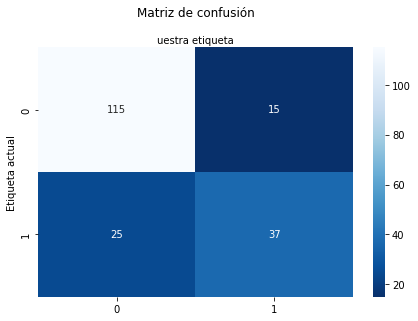

In [25]:
import numpy as np
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

sns.heatmap(pd.DataFrame(cnf_matrix), annot = True, cmap = 'Blues_r', fmt = 'g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Matriz de confusión', y = 1.1)
plt.ylabel('Etiqueta actual')
plt.xlabel('uestra etiqueta')
plt.show()

Este grafico nos muestra que los que si tienen diabetes y predijo correctamente el modelo son 115 y el numero de personas que no tienen diabetes y predijeron correctamente nuestro modelo son 37 personas.
Otra metrica que podemos usar o otro modo de evaluar el modelo es la exactitud.

In [26]:
print('Exactitud', metrics.accuracy_score(y_test, y_pred))

Exactitud 0.7916666666666666
